# Flux density@10 keV is converted using photons indices to desired Energy
i.e.
# Flux density@E keV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib
from matplotlib import gridspec

In [2]:
font = {'family'         : 'serif',
	'weight'         : 'bold',
	'size'	         : 16}
matplotlib.rc('font',**font)
matplotlib.rc('grid',linewidth=1)
matplotlib.rc('xtick.major',width=2)
matplotlib.rc('xtick.major',size=7)
matplotlib.rc('xtick.minor',width=2)
matplotlib.rc('xtick.minor',size=4)
matplotlib.rc('ytick.major',width=2)
matplotlib.rc('ytick.major',size=7)
matplotlib.rc('ytick.minor',width=2)
matplotlib.rc('ytick.minor',size=4)
plt.style.use('classic')

In [5]:


def FdConvert(E0, E, photon_ph):
    
    photon_ph1 = photon_ph - 1 
    Fd1keVfactor_ = E0**(photon_ph1)  # Convert @E0 keV to @ 1 keV
    
    FdEkeVfactor = Fd1keVfactor_*(E**(-photon_ph1))  # Convert @ 1 keV to @ E keV
    
    return FdEkeVfactor
    
    


Length of photon index Time data: 9
Length of flux density data: 9


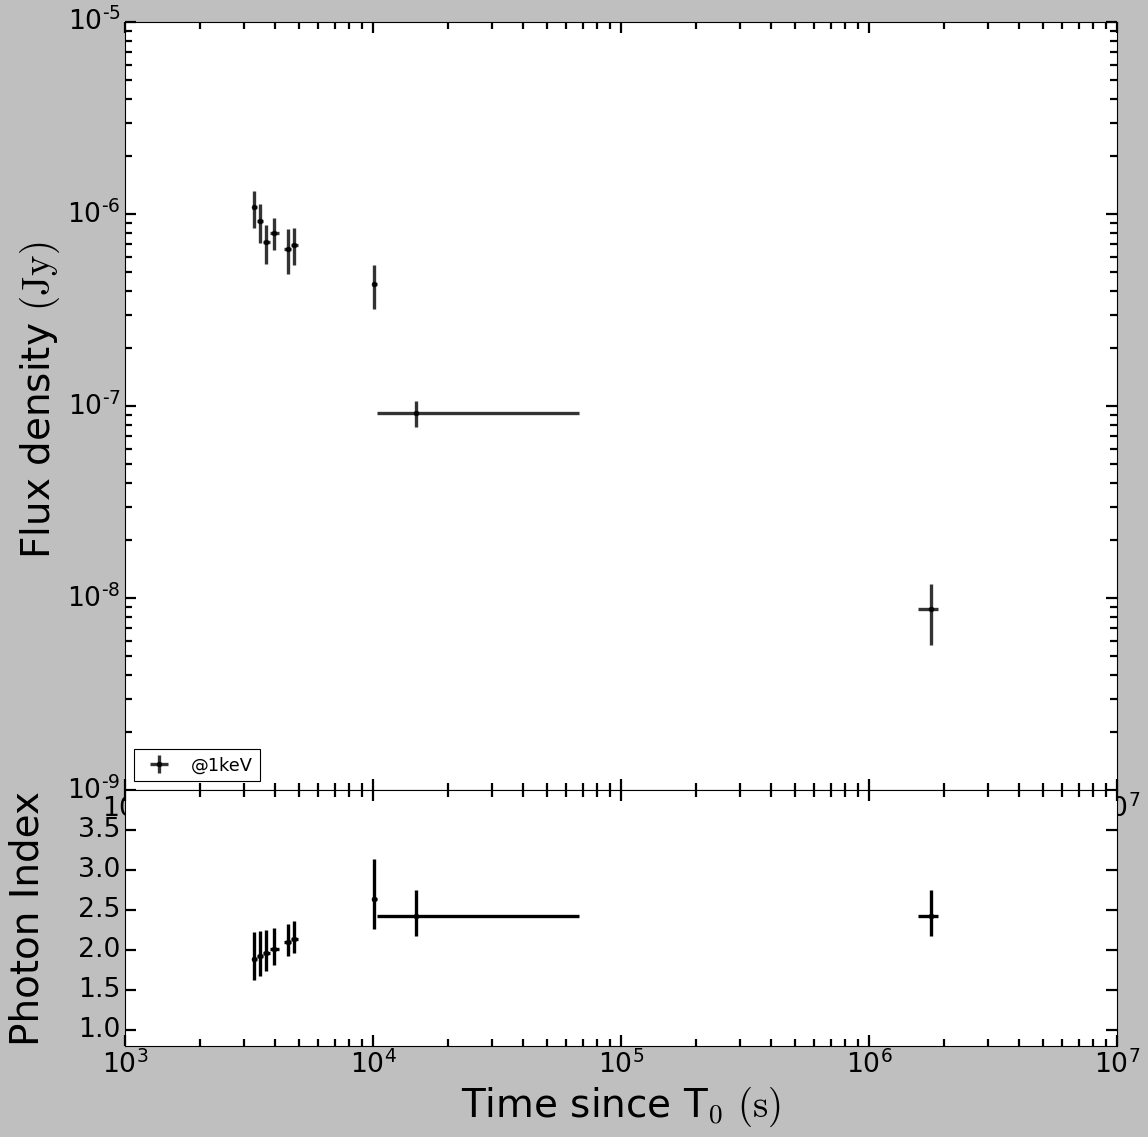

In [6]:
ifl_photon_index = ascii.read('GRB201015A_phindex.txt', header_start = None, data_start=0, comment= '#')
time_read_ph = np.array(ifl_photon_index['col1'])
print("Length of photon index Time data:", len(time_read_ph))
time_p_read_ph = np.array(ifl_photon_index['col2'])
time_n_read_ph = np.array(ifl_photon_index['col3'])
photon_read_ph = np.array(ifl_photon_index['col4'])
photon_err_p_read_ph = np.array(ifl_photon_index['col5'])
photon_err_n_read_ph = np.array(ifl_photon_index['col6'])

time_sort_index_ph = np.argsort(time_read_ph)

time_photon = time_read_ph[time_sort_index_ph]
time_p_ph = time_p_read_ph[time_sort_index_ph]
time_n_ph = time_n_read_ph[time_sort_index_ph]
photon_ph = photon_read_ph[time_sort_index_ph]
photon_err_p_ph = photon_err_p_read_ph[time_sort_index_ph]
photon_err_n_ph = photon_err_n_read_ph[time_sort_index_ph]

photon_ph1 = photon_ph - 1

fig = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0)
ay2 = fig.subplots(2, sharex=True,)
ay2[0] = plt.subplot(gs[0])
ay2[1] = plt.subplot(gs[1])



ay2[1].errorbar(time_photon, photon_ph, xerr=(-1*time_n_ph, time_p_ph), yerr = [-1*photon_err_n_ph, photon_err_p_ph], ls='none',marker='.', color='k',elinewidth=3, capsize=0, markersize=9)
ay2[1].tick_params(direction="in")
#ay2[1].yaxis.set_label_position("right")
#ay2[1].yaxis.tick_right()
ay2[1].tick_params(axis='both',which='minor',length=6,width=2,labelsize=24,)
ay2[1].tick_params(axis='both',which='major',length=10,width=2,labelsize=24,)
ay2[1].set_xlabel(r"Time since T$_{0}$ $(\rm s)$",fontsize=35)
ay2[1].set_ylabel(r'Photon Index',fontsize=35)
ay2[1].yaxis.set_label_coords(-0.08,0.5)
ay2[1].set_ylim(0.8,3.99)
ay2[1].set_xscale('log')
ay2[1].set_yticks([1, 1.5, 2.0, 2.5, 3.0, 3.5])


ifl_d = ascii.read('GRB201015A_Fluxdensity10.txt', header_start = None, data_start=0, comment= '#')

#print ifl

time_read_d = np.array(ifl_d['col1'])
print("Length of flux density data:", len(time_read_d))

time_p_read_d = np.array(ifl_d['col2'])
time_n_read_d = np.array(ifl_d['col3'])
flux_read_d = np.array(ifl_d['col4'])
flux_err_p_read_d = np.array(ifl_d['col5'])
flux_err_n_read_d = np.array(ifl_d['col6'])

time_sort_index_d = np.argsort(time_read_d)

tim_d = time_read_d[time_sort_index_d]
time_p_d = time_p_read_d[time_sort_index_d]
time_n_d = time_n_read_d[time_sort_index_d]
flux_d = flux_read_d[time_sort_index_d]
flux_err_p_d = flux_err_p_read_d[time_sort_index_d]
flux_err_n_d = -1*flux_err_n_read_d[time_sort_index_d]


scale1 =1 
Fd1keVfactor = FdConvert(10, 1, photon_ph) # Apply on @10 keV to get @ 1 keV
flux_d_1keV = flux_d*Fd1keVfactor
flux_d_1keV_n = flux_err_p_d*Fd1keVfactor
flux_d_1keV_p = flux_err_n_d*Fd1keVfactor



ay2[0].errorbar(tim_d , scale1*flux_d_1keV, xerr=(-1*time_n_ph, time_p_ph), yerr = (scale1*flux_d_1keV_n, scale1*flux_d_1keV_p), ls='none',marker='.', color='k',elinewidth=3, capsize=0, markersize=9, alpha=0.8, label=r'@1keV')# $\times 100$')
ay2[0].legend(numpoints=1,prop={'size':16}, loc='lower left')#, bbox_to_anchor=(0.5, 1.20),  ncol=4,labelspacing=0.3)
ay2[0].set_ylabel(r" Flux density $\rm (Jy)$",fontsize=35)
ay2[0].set_xscale('log')
ay2[0].set_yscale('log')
ay2[0].tick_params(direction="in")
ay2[0].tick_params(axis='both',which='minor',length=6,width=2,labelsize=24)
ay2[0].tick_params(axis='both',which='major',length=10,width=2,labelsize=24,)



plt.savefig('GRB201015A_XRT_Fd1keV.pdf', format='pdf')
plt.show()


In [7]:
ascii.write([tim_d,  time_n_ph, time_p_ph, flux_d_1keV, -1*flux_d_1keV_n, flux_d_1keV_p], 'GRB201015A_XRT_Fd1keV.txt', names=['time', 'terr_n', 'terr_p', 'Fd', 'Fd_n', 'Fd_p'], overwrite=True)